In [1]:
# import necessary packages

import pandas as pd
import os
from datetime import datetime # I think this one can probably get deleted
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress
import warnings
#warnings.simplefilter("ignore")
import seaborn as sns

%matplotlib inline

In [2]:
# Import Data as DataFrames
fireData = pd.read_csv("Clean_Data/CA_WildFires.csv")
droughtData = pd.read_csv("Clean_Data/CA_Droughts.csv")

In [ ]:
#Melissa M begin code here

In [3]:
fireData

,Year,Fires,Acres
0,2000,7622,295026
1,2001,9458,329126
2,2002,8328,969890
3,2003,9116,1020460
4,2004,8415,264988
5,2005,7162,222538
6,2006,8202,736022
7,2007,9093,1087110
8,2008,4923,1593690
9,2009,9159,422147


In [4]:
fireData_df = pd.DataFrame(fireData)
fireData_df.head()

,Year,Fires,Acres
0,2000,7622,295026
1,2001,9458,329126
2,2002,8328,969890
3,2003,9116,1020460
4,2004,8415,264988


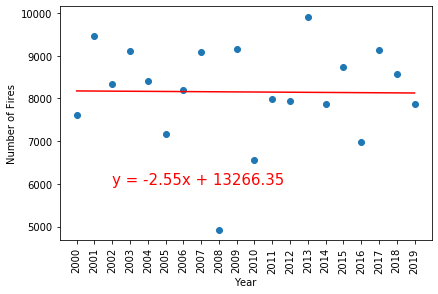

pvalue: 0.9562355227315593
rsqrd: 0.00017200725803528192
rvalue: -0.013115153755685898


In [5]:
# create linear regression graph for Years vs Fires

x_values = fireData["Year"]
y_values = fireData["Fires"]
tick_locations = [2000, 2005, 2010, 2015, 2020]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2002,6000),fontsize=15,color="red")
plt.xticks(x_values, rotation="vertical")
plt.tight_layout()

plt.xlabel("Year")
plt.ylabel("Number of Fires")


plt.show()
print
print(f"pvalue: {pvalue}")
print(f"rsqrd: {rvalue**2}")
print(f"rvalue: {rvalue}")

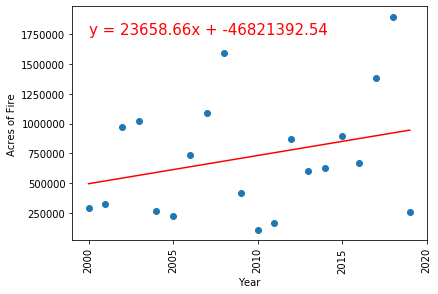

pvalue: 0.22986823646548601
rsqrd: 0.0790337242619478
rvalue: 0.2811293728196109


In [6]:
# create linear regression graph for Years vs Acres

x_values = fireData["Year"]
y_values = fireData["Acres"]
tick_locations = [2000, 2005, 2010, 2015, 2020]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,1750000),fontsize=15,color="red")
plt.xticks(tick_locations, tick_locations, rotation="vertical")
plt.tight_layout()

plt.xlabel("Year")
plt.ylabel("Acres of Fire")


plt.show()
print(f"pvalue: {pvalue}")
print(f"rsqrd: {rvalue**2}")
print(f"rvalue: {rvalue}")

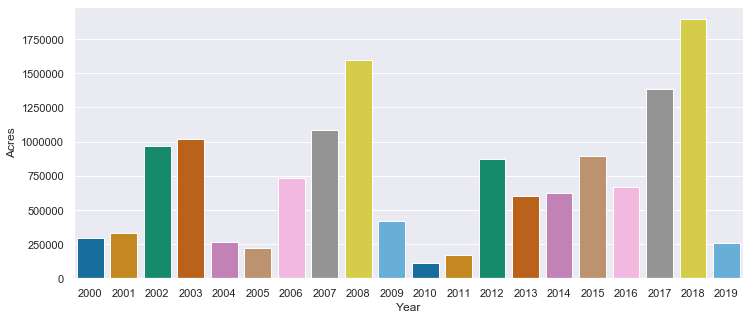

In [7]:
# seaborn bar chart for average DSCI by year
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
ax = sns.barplot(x="Year", y="Acres", data=fireData_df, palette="colorblind")

In [8]:
#Melissa M end code here